<a href="https://colab.research.google.com/github/Quddos/machine-learning/blob/main/AP24135010028_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1 3D coordinates**

In [2]:
import numpy as np
from sklearn.datasets import load_iris
# ---------------------------
# Part 1: Distance between 2 coordinates
# ---------------------------
# Take two 3D coordinates
x = np.array(list(map(float, input("Enter first 3D coordinate (x1 x2 x3): ").split())))
y = np.array(list(map(float, input("Enter second 3D coordinate (y1 y2 y3): ").split())))
# Euclidean distance
euclidean = np.sqrt(np.sum((x - y) ** 2))
# Manhattan distance
manhattan = np.sum(np.abs(x - y))
# Minkowski distance (q=3 as an example)
q = 3
minkowski = (np.sum(np.abs(x - y) ** q)) ** (1 / q)
print("\n--- Distances between given 3D coordinates ---")
print(f"Euclidean Distance : {euclidean:.4f}")
print(f"Manhattan Distance : {manhattan:.4f}")
print(f"Minkowski (q=3) Dist.: {minkowski:.4f}")



Enter first 3D coordinate (x1 x2 x3): 3
Enter second 3D coordinate (y1 y2 y3): 5

--- Distances between given 3D coordinates ---
Euclidean Distance : 2.0000
Manhattan Distance : 2.0000
Minkowski (q=3) Dist.: 2.0000


**Q2 program to obtain the Euclidian Distance Matrix for
all the data samples in the feature space. Distance metric is a 2D array, where the
(i,j)th entry represents the distance between the ith and jth sample points in the feature
space.**

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist

# Load iris dataset
iris = load_iris()
X = iris.data # feature matrix (150 samples, 4 features)
# Distance matrix (Euclidean)
n_samples = X.shape[0]
dist_matrix = np.zeros((n_samples, n_samples))
for i in range(n_samples):
  for j in range(n_samples):
    dist_matrix[i, j] = np.sqrt(np.sum((X[i] - X[j]) ** 2))

print("\nEuclidean Distance Matrix for Iris dataset (first 5x5 block):")
print(dist_matrix[:4, :5]) # printing only a small part



Euclidean Distance Matrix for Iris dataset (first 5x5 block):
[[0.         0.53851648 0.50990195 0.64807407 0.14142136]
 [0.53851648 0.         0.3        0.33166248 0.60827625]
 [0.50990195 0.3        0.         0.24494897 0.50990195]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407]]


**Q3 Draw the scatter
plot for all the samples in the new dataset considering any two input attributes. Examine the scatter plot to find the
equation of a line that can separate sample of two classes.**

Equation of separating line: 3.083*x1 + -3.019*x2 + -7.338 = 0


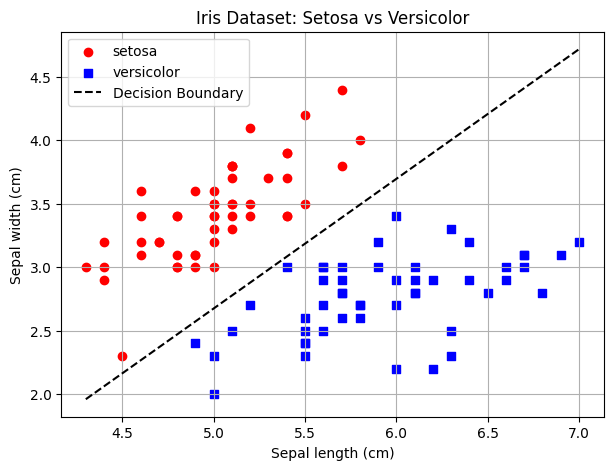

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from sklearn.linear_model import LogisticRegression

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Select two classes (Setosa=0, Versicolor=1) and two features
mask = (y == 0) | (y == 1) # only Setosa and Versicolor
X_two = X[mask][:, :2] # first two features: Sepal length & Sepal width
y_two = y[mask]

# Scatter plot
plt.figure(figsize=(7,5))
for label, marker, color in zip([0,1], ['o','s'], ['red','blue']):
  plt.scatter(X_two[y_two == label, 0], X_two[y_two == label, 1],
  marker=marker, color=color, label=target_names[label])

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Iris Dataset: Setosa vs Versicolor")
plt.legend()
plt.grid(True)

# Train Logistic Regression to find separating line
clf = LogisticRegression()
clf.fit(X_two, y_two)

# Extract line equation
w1, w2 = clf.coef_[0]
b = clf.intercept_[0]
print(f"Equation of separating line: {w1:.3f}*x1 + {w2:.3f}*x2 + {b:.3f} = 0")

# Plot decision boundary
x_vals = np.linspace(X_two[:,0].min(), X_two[:,0].max(), 100)
y_vals = -(w1*x_vals + b)/w2
plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")
plt.legend()
plt.show()

**Implementing Second Output on: Iris: Setosa vs Versicolor with Logistic Regression Line**

Equation of decision boundary: 3.083*x1 + -3.019*x2 + -7.338 = 0
Or: x2 = 1.021*x1 + -2.431


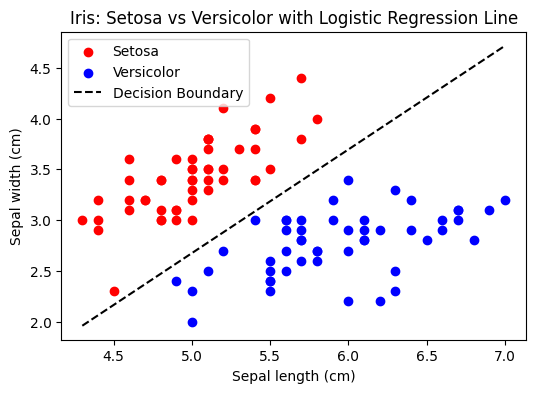

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2] # take sepal length and sepal width
y = iris.target
# Select only Setosa (0) and Versicolor (1)
X = X[y < 2]
y = y[y < 2]
# Train Logistic Regression
clf = LogisticRegression().fit(X, y)
# Get coefficients
w1, w2 = clf.coef_[0]
b = clf.intercept_[0]
print(f"Equation of decision boundary: {w1:.3f}*x1 + {w2:.3f}*x2 + {b:.3f} = 0")
# Convert to y = mx + c
m = -w1 / w2
c = -b / w2
print(f"Or: x2 = {m:.3f}*x1 + {c:.3f}")
# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Versicolor')
# Decision boundary line
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = m * x_values + c
plt.plot(x_values, y_values, 'k--', label="Decision Boundary")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.title("Iris: Setosa vs Versicolor with Logistic Regression Line")
plt.show()